<div style="background-image: linear-gradient(to right, #4b4cff , #00d4ff); text-align: center; padding: 50px;">
  <h1 style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size: 48px; color: white; text-shadow: 2px 2px #4b4cff;">
    Pattern Recognition and Biometrics
  </h1>
</div>

<h1 style="color:white; background-color: #ADD8E6; padding:15px; text-align: center;">
TP Cluster
</h1>

<h2 style="color:#f7ce5b; font-family: Arial, sans-serif; font-size: 40px; margin-top: 50px; border-bottom: 2px solid #f7ce5b;">
Library
</h2>

In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [22]:
data = pd.read_csv("./data/optdigits.tra")

data_test = pd.read_csv("./data/optdigits.tes")

In [23]:
display(data_test)

,0,0.1,5,13,9,1,0.2,0.3,0.4,0.5,...,0.23,0.24,0.25,6,13.2,10.2,0.26,0.27,0.28,0.29
0,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
1,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
2,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
3,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4
4,0,0,12,10,0,0,0,0,0,0,...,0,0,0,9,16,16,10,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1792,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1793,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1794,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


# K-Means

In [24]:
X_train = data.iloc[:, :64]
y_train = data.iloc[:, 64]
X_test = data.iloc[:, :64]
y_test = data.iloc[:, 64]

On récupère le clustering dans kmeans, et on récupére les labels de tout les points.


La deuxième ligne attribue les étiquettes de cluster à une variable appelée "labels". Chaque élément de "labels" correspond à l'affectation de cluster d'une ligne dans l'ensemble de données "data". Par exemple, si "labels[0]" est 3, cela signifie que la première ligne de "data" a été affectée au cluster 3 par l'algorithme KMeans.

In [25]:
kmeans = KMeans(n_clusters = 10,n_init=5 ).fit(X_train)
labels = kmeans.labels_
clusters = kmeans.predict(X_train)
count_df = pd.DataFrame({'cluster': clusters, 'digit': y_train}).groupby(['cluster', 'digit']).size().unstack(fill_value=0)

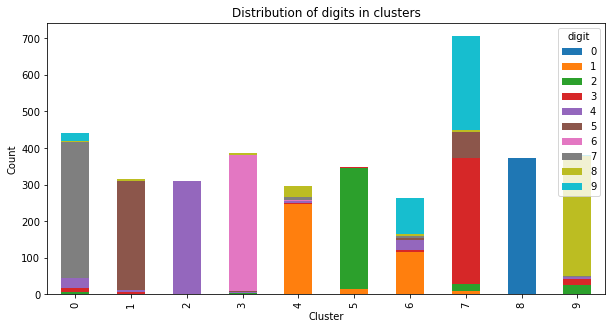

In [26]:
import matplotlib.pyplot as plt

count_df.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of digits in clusters')
plt.show()

In [27]:
silhouette = silhouette_score(X_train, clusters)
print(silhouette)

0.1915253133207275


L'indice de silhouette varie entre -1 et 1, où une valeur proche de 1 indique que les points sont bien regroupés et séparés, et une valeur proche de -1 indique que les points sont mal regroupés et qu'ils devraient être dans d'autres clusters.

Pour n_clusters = 2 L'indice de silhouette est : 0.12200027294792809
Pour n_clusters = 3 L'indice de silhouette est : 0.12045676726671661
Pour n_clusters = 4 L'indice de silhouette est : 0.1326428696342981
Pour n_clusters = 5 L'indice de silhouette est : 0.14816537726936566
Pour n_clusters = 6 L'indice de silhouette est : 0.16027254382187156
Pour n_clusters = 7 L'indice de silhouette est : 0.17076246005427223
Pour n_clusters = 8 L'indice de silhouette est : 0.18065985296567824
Pour n_clusters = 9 L'indice de silhouette est : 0.18879370245115568
Pour n_clusters = 10 L'indice de silhouette est : 0.19133348910605977
Pour n_clusters = 11 L'indice de silhouette est : 0.18033065192235004
Pour n_clusters = 12 L'indice de silhouette est : 0.18750764505746986
Pour n_clusters = 13 L'indice de silhouette est : 0.1880375425722623
Pour n_clusters = 14 L'indice de silhouette est : 0.1768726569078691
Pour n_clusters = 15 L'indice de silhouette est : 0.18513724569860016
Pour n_clusters = 16 L'indice d

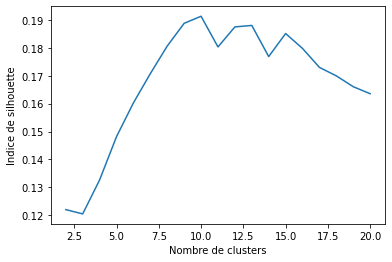

In [28]:
silhouette_avgs = []

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=n_clusters, n_init=5).fit(X_train)
    cluster = kmeans.predict(X_train)

    silhouette_avg = silhouette_score(X_train, cluster)
    silhouette_avgs.append(silhouette_avg)

    print("Pour n_clusters =", n_clusters, "L'indice de silhouette est :", silhouette_avg)

plt.plot(range(2, 21), silhouette_avgs)
plt.xlabel('Nombre de clusters')
plt.ylabel('Indice de silhouette')
plt.show()

Après plusieurs essais, on voit que l'indide ce silhouette va diminuer lorsqu'on augmente le nombre de clusters.
Le meilleur clustering est atteint pour **K = 10**. Ce qui est cohérent car on a bien 10 chiffres dans ce jeu de données.

In [29]:
majority_labels = []

for i in range(count_df.shape[0]):
    majority_labels.append(count_df.iloc[i].idxmax())
    print("Cluster ", i, " - Majority class: ", majority_labels[i])

Cluster  0  - Majority class:  7
Cluster  1  - Majority class:  5
Cluster  2  - Majority class:  4
Cluster  3  - Majority class:  6
Cluster  4  - Majority class:  1
Cluster  5  - Majority class:  2
Cluster  6  - Majority class:  1
Cluster  7  - Majority class:  3
Cluster  8  - Majority class:  0
Cluster  9  - Majority class:  8


In [30]:
from scipy.spatial.distance import cdist

kmeans = KMeans(n_clusters=10, n_init=5).fit(X_train)

cluster_centers = kmeans.cluster_centers_

distances = cdist(X_test, cluster_centers, metric='euclidean')
nearest_cluster_indices = np.argmin(distances, axis=1)


predicted_labels = kmeans.labels_[nearest_cluster_indices]

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score

true_labels = y_train

confusion_mat = confusion_matrix(true_labels, clusters)
accuracy = accuracy_score(true_labels, clusters)

print("Confusion matrix:\n", confusion_mat)
print("Accuracy:", accuracy)

Confusion matrix:
 [[  0   0   1   1   0   0   1   0 372   0]
 [  1   1   0   1 247  15 115   9   0   0]
 [  5   0   0   1   0 329   0  19   0  26]
 [ 11   5   0   0   2   5   4 345   0  17]
 [ 28   7 308   4   6   0  29   0   0   5]
 [  0 298   0   2   1   0   5  70   0   0]
 [  0   0   1 373   3   0   0   0   0   0]
 [372   0   0   0   6   0   6   0   0   3]
 [  1   3   0   4  31   0   6   7   0 328]
 [ 24   2   0   0   1   0  96 257   0   2]]
Accuracy: 0.002354788069073783


<h1 style="color:white; background-color: #ADD8E6; padding:15px; text-align: center;">
Cluster Hierarchique
</h1>

Dans ce dendrogramme, chaque branche verticale représente un cluster, et la hauteur de la branche représente la distance entre les clusters liés. Les feuilles de l'arbre représentent les observations individuelles. 

Le critère de Ward a été utilisé ici pour minimiser la somme des carrés des différences entre les observations dans chaque cluster. Ainsi, chaque fusion de cluster est effectuée en minimisant la somme des carrés des distances entre les observations et leur centroides dans le nouveau cluster formé.

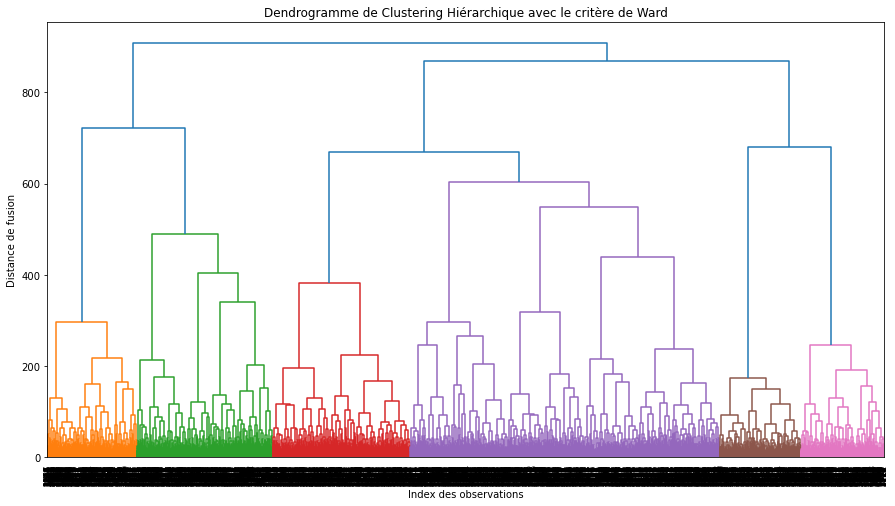

In [32]:
Hier_clust = linkage(data, method='ward')

plt.figure(figsize=(15, 8))
dendrogram(Hier_clust, leaf_font_size=8)

k = 10
clusters = fcluster(Hier_clust, k, criterion='maxclust')

plt.xlabel('Index des observations')
plt.ylabel('Distance de fusion')
plt.title('Dendrogramme de Clustering Hiérarchique avec le critère de Ward')

plt.show()

In [33]:
silhouette_avg = silhouette_score(data, clusters)
print("L'indice de silhouette pour K={}: {:.4f}".format(k, silhouette_avg))

L'indice de silhouette pour K=10: 0.1780


In [34]:
for k in range (10,21) : 
    clusters = fcluster(Hier_clust, k, criterion='maxclust')
    silhouette_avg = silhouette_score(data, clusters)
    print("L'indice de silhouette pour K={}: {:.4f}".format(k, silhouette_avg))

L'indice de silhouette pour K=10: 0.1780
L'indice de silhouette pour K=11: 0.1826
L'indice de silhouette pour K=12: 0.1773
L'indice de silhouette pour K=13: 0.1788
L'indice de silhouette pour K=14: 0.1785
L'indice de silhouette pour K=15: 0.1749
L'indice de silhouette pour K=16: 0.1664
L'indice de silhouette pour K=17: 0.1696
L'indice de silhouette pour K=18: 0.1548
L'indice de silhouette pour K=19: 0.1548
L'indice de silhouette pour K=20: 0.1533


On voit que le meilleur indice obtenu est pour 11 clusters. Cela correspond à peu près au 10 clusters des 10 chiffres que l'on devrait avoir. Et on obtient 0.1826 contre 0.19 précédemment, on reste dans le même ordre de grandeur.

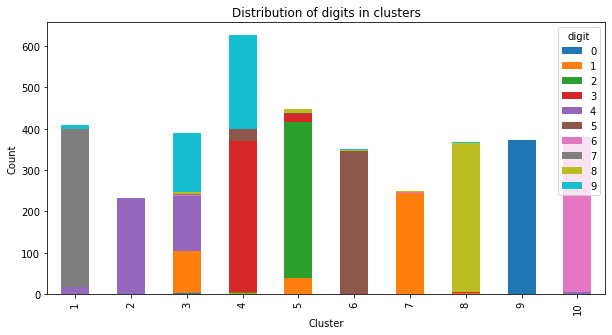

In [39]:
clusters = fcluster(Hier_clust, 10, criterion='maxclust')
count_df = pd.DataFrame({'cluster': clusters, 'digit': y_train}).groupby(['cluster', 'digit']).size().unstack(fill_value=0)
count_df.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of digits in clusters')
plt.show()

In [40]:
majority_labels = []

for i in range(count_df.shape[0]):
    majority_labels.append(count_df.iloc[i].idxmax())
    print("Cluster ", i, " - Majority class: ", majority_labels[i])

Cluster  0  - Majority class:  7
Cluster  1  - Majority class:  4
Cluster  2  - Majority class:  9
Cluster  3  - Majority class:  3
Cluster  4  - Majority class:  2
Cluster  5  - Majority class:  5
Cluster  6  - Majority class:  1
Cluster  7  - Majority class:  8
Cluster  8  - Majority class:  0
Cluster  9  - Majority class:  6


In [41]:
from scipy.spatial.distance import cdist

kmeans = KMeans(n_clusters=10, n_init=5).fit(X_train)
cluster_centers = kmeans.cluster_centers_


distances = cdist(X_test, cluster_centers, metric='euclidean')
nearest_cluster_indices = np.argmin(distances, axis=1)

# Attribuer à chaque élément de la base de test le label associé au cluster le plus proche
predicted_labels = kmeans.labels_[nearest_cluster_indices]

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score

true_labels = y_train

confusion_mat = confusion_matrix(true_labels, clusters)
accuracy = accuracy_score(true_labels, clusters)

print("Confusion matrix:\n", confusion_mat)
print("Accuracy:", accuracy)

Confusion matrix:
 [[  0   0   0   2   0   0   0   0   0 372   1]
 [  0   0   0 101   2  38   0 245   3   0   0]
 [  0   0   0   0   2 378   0   0   0   0   0]
 [  0   0   0   1 366  20   1   0   1   0   0]
 [  0  18 233 132   0   0   0   0   0   0   4]
 [  0   0   0   2  28   1 345   0   0   0   0]
 [  0   0   0   1   0   0   0   1   0   0 375]
 [  0 382   0   4   0   1   0   0   0   0   0]
 [  0   0   0   4   1   9   2   3 361   0   0]
 [  0   9   0 142 227   0   2   0   2   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]]
Accuracy: 0.09497645211930926


<h1 style="color:white; background-color: #ADD8E6; padding:15px; text-align: center;">
Cluster Hierarchique
</h1>

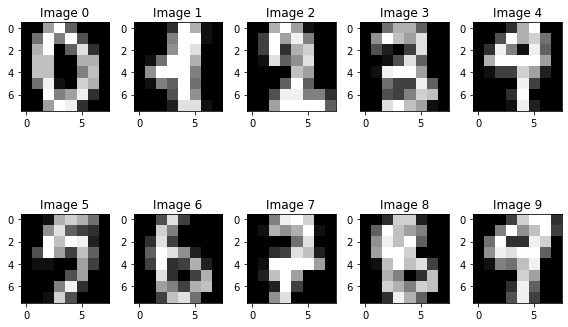

In [68]:
import numpy as np
import cv2

data = pd.read_csv("./data/optdigits.tra")

selected_indices = []
for label in range(10):
    indices = np.where(data["0.26"] == label)[0]
    selected_indices.append(indices[0])

print_df = np.zeros((10, 65))

print_df = data.iloc[selected_indices]

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(8, 6))

for i, ax in enumerate(axs.flat):
    image_matrix = print_df.iloc[i, :64].values.reshape(8, 8)
    ax.imshow(image_matrix, cmap='gray')
    ax.set_title(f"Image {i}")

plt.tight_layout()
plt.show()

for i in range(10):
    filename = f'images/optdigit_{i}.png'
    image_data = print_df.iloc[i, :64].values.reshape(8, 8)
    cv2.imwrite(filename, image_data)